**Importing Necessary Libraries**

In [1]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/deceptive-opinion.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


C:\Users\user\AppData\Local\Temp\ipykernel_5980\2114105910.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
import re
import string
from nltk.corpus import stopwords
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

**Checking Data**

In [3]:
df = pd.read_csv('deceptive-opinion.csv')

In [4]:
df.head()

,deceptive,hotel,polarity,source,text
0,truthful,conrad,positive,TripAdvisor,We stayed for a one night getaway with family ...
1,truthful,hyatt,positive,TripAdvisor,Triple A rate with upgrade to view room was le...
2,truthful,hyatt,positive,TripAdvisor,This comes a little late as I'm finally catchi...
3,truthful,omni,positive,TripAdvisor,The Omni Chicago really delivers on all fronts...
4,truthful,hyatt,positive,TripAdvisor,I asked for a high floor away from the elevato...


In [5]:
df = df.sample(frac=1)

In [6]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

df['deceptive']= label_encoder.fit_transform(df['deceptive'])

df['deceptive'].unique()

array([1, 0])

In [7]:
df.groupby('deceptive').describe()

hotel                         polarity                       source  \
          count unique         top freq    count unique       top freq  count   
deceptive                                                                       
0           800     20  ambassador   40      800      2  positive  400    800   
1           800     20       hyatt   40      800      2  positive  400    800   

                                    text         \
          unique          top freq count unique   
deceptive                                         
0              1        MTurk  800   800    800   
1              2  TripAdvisor  400   800    796   

                                                                   
                                                         top freq  
deceptive                                                          
0          The Ambassador East Hotel is a business that c...    1  
1          I'd been searching for a cool, non-chain hotel...    2

**Cleaning Text**

In [8]:
def clean_text(text):

    text = text.translate(string.punctuation)

    text = text.lower().split()

    stops = set(stopwords.words("english"))
    text = [w for w in text if not w in stops and len(w) >= 3]

    text = " ".join(text)

    # Clean the text
    text = re.sub(r"[^A-Za-z0-9^,!.\/'+-=]", " ", text)
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r",", " ", text)
    text = re.sub(r"\.", " ", text)
    text = re.sub(r"!", " ! ", text)
    text = re.sub(r"\/", " ", text)
    text = re.sub(r"\^", " ^ ", text)
    text = re.sub(r"\+", " + ", text)
    text = re.sub(r"\-", " - ", text)
    text = re.sub(r"\=", " = ", text)
    text = re.sub(r"'", " ", text)
    text = re.sub(r"(\d+)(k)", r"\g<1>000", text)
    text = re.sub(r":", " : ", text)
    text = re.sub(r" e g ", " eg ", text)
    text = re.sub(r" b g ", " bg ", text)
    text = re.sub(r" u s ", " american ", text)
    text = re.sub(r"\0s", "0", text)
    text = re.sub(r" 9 11 ", "911", text)
    text = re.sub(r"e - mail", "email", text)
    text = re.sub(r"j k", "jk", text)
    text = re.sub(r"\s{2,}", " ", text)

    text = text.split()
    stemmer = SnowballStemmer('english')
    stemmed_words = [stemmer.stem(word) for word in text]
    text = " ".join(stemmed_words)

    return text

In [9]:

puncts = [',', '.', '"', ':', ')', '(', '-', '!', '?', '|', ';', "'", '$', '&', '/', '[', ']', '>', '%', '=', '#', '*', '+', '\\', '•',  '~', '@', '£',
 '·', '_', '{', '}', '©', '^', '®', '`',  '<', '→', '°', '€', '™', '›',  '♥', '←', '×', '§', '″', '′', 'Â', '█', '½', 'à', '…',
 '“', '★', '”', '–', '●', 'â', '►', '−', '¢', '²', '¬', '░', '¶', '↑', '±', '¿', '▾', '═', '¦', '║', '―', '¥', '▓', '—', '‹', '─',
 '▒', '：', '¼', '⊕', '▼', '▪', '†', '■', '’', '▀', '¨', '▄', '♫', '☆', 'é', '¯', '♦', '¤', '▲', 'è', '¸', '¾', 'Ã', '⋅', '‘', '∞',
 '∙', '）', '↓', '、', '│', '（', '»', '，', '♪', '╩', '╚', '³', '・', '╦', '╣', '╔', '╗', '▬', '❤', 'ï', 'Ø', '¹', '≤', '‡', '√', ]

def clean_char(x):
    x = str(x)
    for punct in puncts:
        if punct in x:
            x = x.replace(punct, f' {punct} ')
    return x

In [10]:
def clean_numbers(x):
    if bool(re.search(r'\d', x)):
        x = re.sub('[0-9]{5,}', '#####', x)
        x = re.sub('[0-9]{4}', '####', x)
        x = re.sub('[0-9]{3}', '###', x)
        x = re.sub('[0-9]{2}', '##', x)
    return x

In [11]:
df['text'] = df['text'].map(lambda a: clean_numbers(a))

In [12]:
df['text'] = df['text'].map(lambda a: clean_char(a))

In [13]:
df['text'] = df['text'].map(lambda a: clean_text(a))

In [14]:
df['text']

41      paid night pricelin excel june room fantast vi...
636     ambassador east hotel busi certain strive keep...
721     hotel allegro chicago underst luxuri love mini...
1033    experi ambassador hotel seem star establish bu...
1045    central locat loop direct south 7th day advent...
                              ...                        
790     amalfi hotel chicago wonder hotel opportun sta...
1235    recent displeasur stay conrad chicago although...
910     upon first enter hotel greet friend help bellm...
254     hotel reserv anoth hotel set read negat review...
1481    peopl think hilton think luxuri know wish half...
Name: text, Length: 1600, dtype: object

In [15]:
df.describe()

,deceptive
count,1600.000000
mean,0.500000
std,0.500156
min,0.000000
25%,0.000000
50%,0.500000
75%,1.000000
max,1.000000


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1600 entries, 41 to 1481
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   deceptive  1600 non-null   int32 
 1   hotel      1600 non-null   object
 2   polarity   1600 non-null   object
 3   source     1600 non-null   object
 4   text       1600 non-null   object
dtypes: int32(1), object(4)
memory usage: 68.8+ KB


**Train Test Split**

In [17]:
x = df['text']
y = df['deceptive']

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['text'], df['deceptive'], random_state=5)
print('Number of rows in the total set: {}'.format(df.shape[0]))
print('Number of rows in the training set: {}'.format(X_train.shape[0]))
print('Number of rows in the test set: {}'.format(X_test.shape[0]))

Number of rows in the total set: 1600
Number of rows in the training set: 1200
Number of rows in the test set: 400


In [20]:
X_train, X_test, y_train, y_test

(1381    hard rock stick restaur recent stay hard rock ...
 1278    hyatt regenc hotel chicago worst hotel ever we...
 639     husband came ambassador east hotel sister wed ...
 475     famili vacat chicago stay omni chicago hotel u...
 981     book two room four month advanc talbott place ...
                               ...                        
 1282    recent stay swissotel chicago husband two chil...
 714     hilton chicago amaz close almost everyth chica...
 672     travel anywher near lake michigan within next ...
 1478    disappoint hotel front desk clerk rude person ...
 1246    got home stay fairmont chicago millennium park...
 Name: text, Length: 1200, dtype: object,
 798     amaz swept away walk hotel gorgeous staff nice...
 351     book via pricelin com weekend getaway got room...
 203     book room onlin got great rate cheap summer ho...
 611     best choic husband could chosen visit hotel st...
 364     stay night book via hotwir upgrad histor tower...
              

**Vectorizing the text**

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
count_vector = CountVectorizer()
print(count_vector)

CountVectorizer()


In [22]:
training_data = count_vector.fit_transform(X_train)
testing_data = count_vector.transform(X_test)

In [23]:
first_element = X_test.iloc[0]
my_test_data = count_vector.transform([first_element])

In [24]:
first_element

'amaz swept away walk hotel gorgeous staff nice help hotel clean food delici stay two night first night went lockwood restaur blown away food best food chicago atmospher classi warm wait staff precis decor room look like hotel eleg invit cannot wait back true escap daili life'

**Making Our Model**

In [25]:
from sklearn.naive_bayes import MultinomialNB
naive_bayes = MultinomialNB()
naive_bayes.fit(training_data, y_train)

MultinomialNB()

In [26]:
user_input = "hello eveyone in the world"

In [27]:
my_test_data = count_vector.transform([user_input])

In [28]:
predictions = naive_bayes.predict(testing_data)
predictions

array([0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,

**Saving Model**

In [29]:
import joblib
joblib.dump(naive_bayes, 'naive_bayes_model.joblib')

['naive_bayes_model.joblib']

In [30]:
joblib.dump(count_vector, 'count_vectorizer.joblib')

['count_vectorizer.joblib']

**Model Evaluation**

In [31]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
mnbaccuracy = accuracy_score(y_test, predictions)
print('Accuracy score: ', format(accuracy_score(y_test, predictions)))
print('Precision score: ', format(precision_score(y_test, predictions)))
print('Recall score: ', format(recall_score(y_test, predictions)))
print('F1 score: ', format(f1_score(y_test, predictions)))

Accuracy score:  0.885
Precision score:  0.9095744680851063
Recall score:  0.855
F1 score:  0.8814432989690721


**Comparing Different Models**

**SVC**

In [32]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(training_data, y_train)

SVC()

In [33]:
svc_predictions = svc.predict(testing_data)

In [34]:
from sklearn.metrics import accuracy_score
svcaccuracy = accuracy_score(y_test,svc_predictions)
print('Accuracy score: ', format(accuracy_score(y_test,svc_predictions)))
print('Precision score: ', format(precision_score(y_test,svc_predictions)))
print('Recall score: ', format(recall_score(y_test, svc_predictions)))
print('F1 score: ', format(f1_score(y_test, svc_predictions)))

Accuracy score:  0.8675
Precision score:  0.8585365853658536
Recall score:  0.88
F1 score:  0.8691358024691358


**KNN**

In [35]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(training_data, y_train)

KNeighborsClassifier(n_neighbors=7)

In [36]:
knn_predictions = knn.predict(testing_data)

In [37]:
from sklearn.metrics import accuracy_score
knnaccuracy = accuracy_score(knn_predictions,y_test )
print('Accuracy score: ', format(accuracy_score(knn_predictions,y_test )))
print('Precision score: ', format(precision_score(y_test,knn_predictions)))
print('Recall score: ', format(recall_score(y_test, knn_predictions)))
print('F1 score: ', format(f1_score(y_test, knn_predictions)))

Accuracy score:  0.5725
Precision score:  0.8222222222222222
Recall score:  0.185
F1 score:  0.3020408163265306


**GaussianNB**

In [38]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
training_data1 = training_data.toarray()
gnb.fit(training_data1, y_train)

GaussianNB()

In [39]:
testing_data1= testing_data.toarray()
gnb_predictions = gnb.predict(testing_data1)

In [40]:
from sklearn.metrics import accuracy_score
gnb_accuracy = accuracy_score(gnb_predictions,y_test )
print('Accuracy score: ', format(accuracy_score(gnb_predictions,y_test )))
print('Precision score: ', format(precision_score(y_test,gnb_predictions)))
print('Recall score: ', format(recall_score(y_test, gnb_predictions)))
print('F1 score: ', format(f1_score(y_test, gnb_predictions)))

Accuracy score:  0.7125
Precision score:  0.7297297297297297
Recall score:  0.675
F1 score:  0.7012987012987013


**Decision Tree**

In [41]:
# training a DescisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
dtree_model = DecisionTreeClassifier(max_depth = 2)
dtree_model.fit(training_data1, y_train)

DecisionTreeClassifier(max_depth=2)

In [42]:
dtree_predictions = dtree_model.predict(testing_data)

In [43]:
from sklearn.metrics import accuracy_score
dtree_accuracy = accuracy_score(dtree_predictions,y_test )
print('Accuracy score: ', format(accuracy_score(dtree_predictions,y_test )))
print('Precision score: ', format(precision_score(y_test,dtree_predictions)))
print('Recall score: ', format(recall_score(y_test, dtree_predictions)))
print('F1 score: ', format(f1_score(y_test, dtree_predictions)))

Accuracy score:  0.7
Precision score:  0.7564102564102564
Recall score:  0.59
F1 score:  0.6629213483146067


**SGDClassifier**

In [44]:
from sklearn.linear_model import SGDClassifier

In [45]:
sgd_clf = SGDClassifier()
sgd_clf.fit(training_data, y_train)

SGDClassifier()

In [46]:
sgdpredicted = sgd_clf.predict(testing_data)

In [47]:
from sklearn.metrics import accuracy_score
sgd_accuracy = accuracy_score(sgdpredicted,y_test )
print('Accuracy score: ', format(accuracy_score(sgdpredicted,y_test )))
print('Precision score: ', format(precision_score(y_test,sgdpredicted)))
print('Recall score: ', format(recall_score(y_test, sgdpredicted)))
print('F1 score: ', format(f1_score(y_test, sgdpredicted)))

Accuracy score:  0.8675
Precision score:  0.855072463768116
Recall score:  0.885
F1 score:  0.8697788697788698


**Logistic Regression**

In [48]:
from sklearn.linear_model import LogisticRegression

In [49]:
lr = LogisticRegression()
lr.fit(training_data, y_train)

LogisticRegression()

In [50]:
lrpredicted = lr.predict(testing_data)

In [51]:
from sklearn.metrics import accuracy_score
lr_accuracy = accuracy_score(lrpredicted,y_test )
print('Accuracy score: ', format(accuracy_score(lrpredicted,y_test )))
print('Precision score: ', format(precision_score(y_test,lrpredicted)))
print('Recall score: ', format(recall_score(y_test, lrpredicted)))
print('F1 score: ', format(f1_score(y_test, lrpredicted)))

Accuracy score:  0.855
Precision score:  0.8585858585858586
Recall score:  0.85
F1 score:  0.8542713567839196


In [52]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score

In [53]:
print('Multinomial Naive Bayes:',mnbaccuracy)
print('Gausian Naive Bayes:',gnb_accuracy)
print('Decision tree:',dtree_accuracy)
print('Support Vector Classifier:',svcaccuracy)
print('K-Nearest Neighbour:',knnaccuracy)
print('Stochastic Gradient Descent:',sgd_accuracy)
print('LogisticRegression:',lr_accuracy)

Multinomial Naive Bayes: 0.885
Gausian Naive Bayes: 0.7125
Decision tree: 0.7
Support Vector Classifier: 0.8675
K-Nearest Neighbour: 0.5725
Stochastic Gradient Descent: 0.8675
LogisticRegression: 0.855


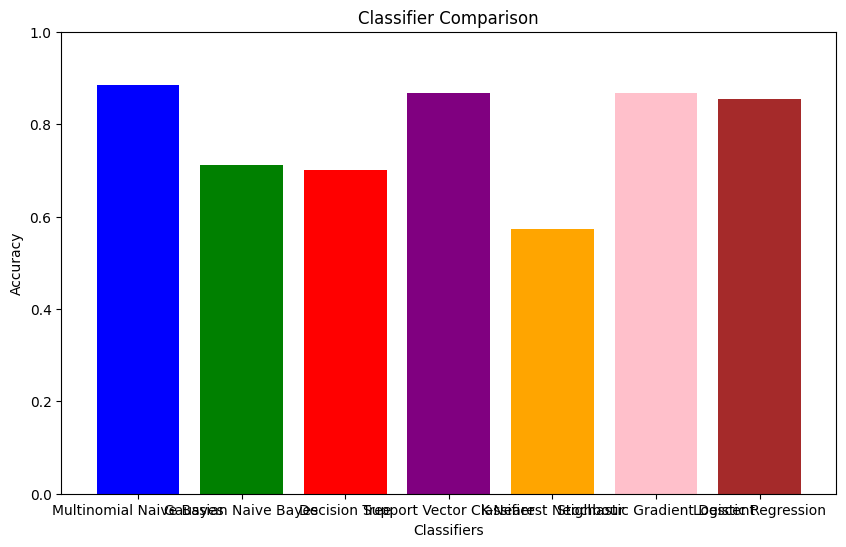

In [54]:
import matplotlib.pyplot as plt

# Assuming you have variables mnbaccuracy, gnb_accuracy, dtree_accuracy, svcaccuracy, knnaccuracy, sgd_accuracy, lr_accuracy defined

classifiers = ['Multinomial Naive Bayes', 'Gaussian Naive Bayes', 'Decision Tree', 'Support Vector Classifier', 'K-Nearest Neighbour', 'Stochastic Gradient Descent', 'Logistic Regression']
accuracies = [mnbaccuracy, gnb_accuracy, dtree_accuracy, svcaccuracy, knnaccuracy, sgd_accuracy, lr_accuracy]

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(classifiers, accuracies, color=['blue', 'green', 'red', 'purple', 'orange', 'pink', 'brown'])
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.title('Classifier Comparison')
plt.ylim(0, 1)  # Set the y-axis limits to represent accuracy between 0 and 1
plt.show()